In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")
colors = { 'magenta': 'magenta', 'orange': '#FF5733', 'green': 'rgb(0, 255, 0)', 'blue': 'rgb(0, 0, 255)', 'pink': '#FF33A1' }

In [3]:
df = pd.read_csv("./shopping_trends.csv")
df.sample(5)

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
2254,2255,24,Male,Belt,Accessories,79,North Dakota,M,Gold,Winter,4.2,No,Venmo,Store Pickup,No,No,44,PayPal,Every 3 Months
901,902,60,Male,Scarf,Accessories,68,Missouri,L,Violet,Summer,4.7,Yes,Debit Card,2-Day Shipping,Yes,Yes,34,Cash,Monthly
1528,1529,69,Male,T-shirt,Clothing,75,Oregon,S,Red,Spring,4.0,No,Credit Card,Store Pickup,Yes,Yes,47,Venmo,Bi-Weekly
2443,2444,24,Male,Backpack,Accessories,30,South Dakota,M,Green,Spring,3.4,No,Venmo,2-Day Shipping,No,No,24,Bank Transfer,Bi-Weekly
3365,3366,43,Female,Skirt,Clothing,58,Tennessee,L,Teal,Fall,3.9,No,Bank Transfer,Express,No,No,45,Credit Card,Every 3 Months


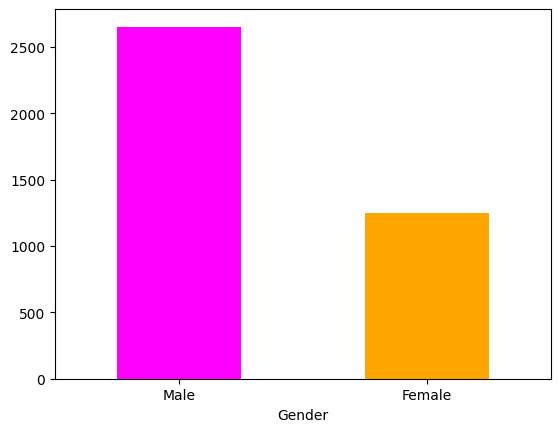

In [4]:
ax = df['Gender'].value_counts().plot(kind='bar', rot=0, color = colors)
plt.show()

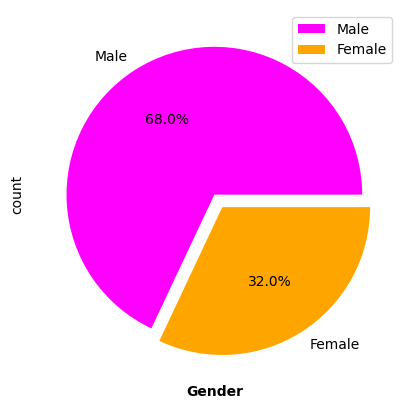

In [5]:
counts = df['Gender'].value_counts()
counts.plot(kind='pie', colors=colors, explode=(0,0.1), autopct='%1.1f%%')
plt.xlabel('Gender', weight='bold')
plt.legend()
plt.show()

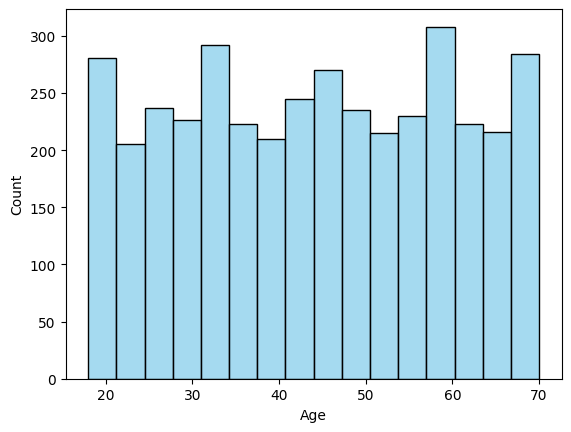

In [6]:
sns.histplot(data=df['Age'], color = 'skyblue')
plt.show()

In [7]:
df['Category'].value_counts()

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

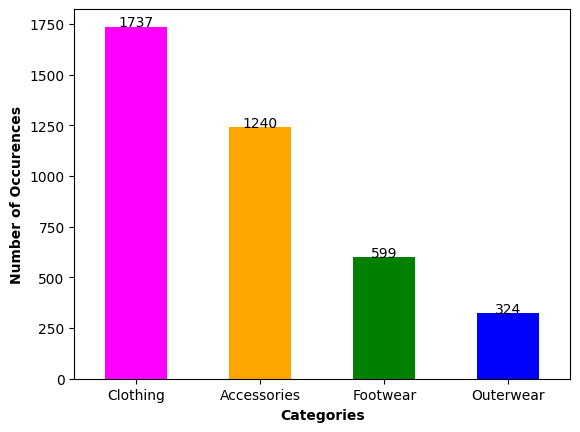

In [8]:
ax = df['Category'].value_counts().plot(kind='bar', color=colors, rot=0)

for p in ax.patches :
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), ha='center')

plt.xlabel('Categories', weight="bold")
plt.ylabel('Number of Occurences', weight='bold')
plt.show


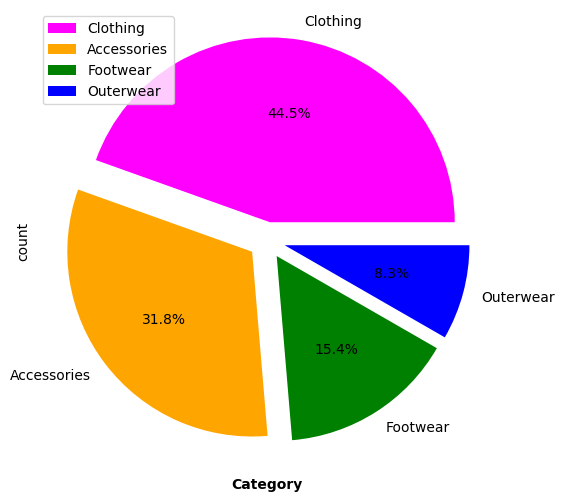

In [9]:
plt.figure(figsize = (35,6))
counts = df['Category'].value_counts()
explode = [0.1]*len(counts)
counts.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%')
plt.xlabel('Category', weight='bold')
plt.legend()
plt.show()

In [10]:
def get_pieChart(column):
    plt.figure(figsize = (20,6))
    counts = df[column].value_counts()
    explode = explode = [0.1]*len(counts)
    counts.plot(kind='pie', colors=colors, explode=explode, autopct='%1.1f%%')
    plt.xlabel(column,weight='bold')
    plt.legend()
    plt.show()


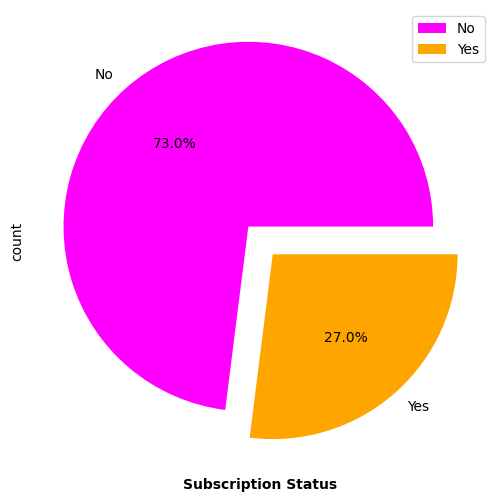

In [11]:
get_pieChart("Subscription Status")

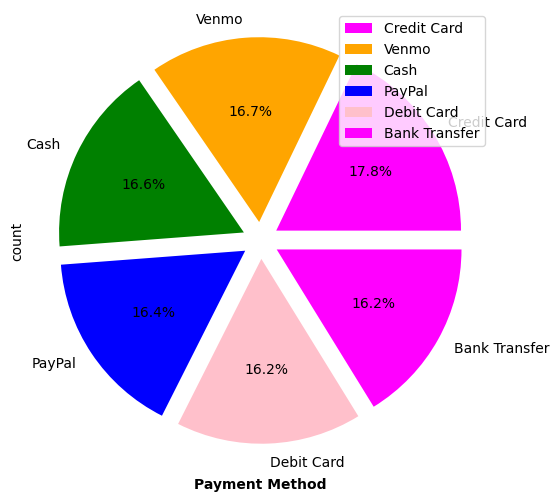

In [12]:
get_pieChart("Payment Method")

In [13]:
def get_BarChart(column):
    plt.figure(figsize=(20,6))
    ax = df[column].value_counts().plot(kind='bar', color=colors, rot=0)

    for p in ax.patches:
        ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), ha='center')

    plt.xlabel(column, weight='bold')
    plt.ylabel('Number of Occurences', weight='bold')
    plt.show()

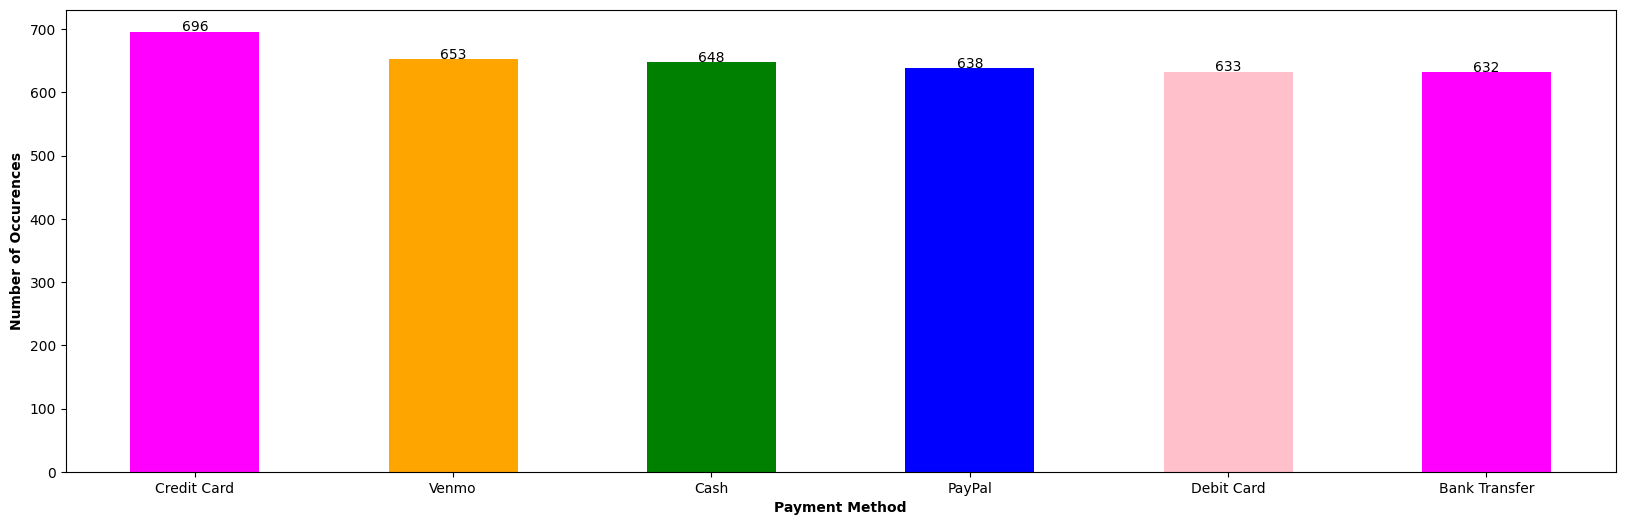

In [14]:
get_BarChart("Payment Method")

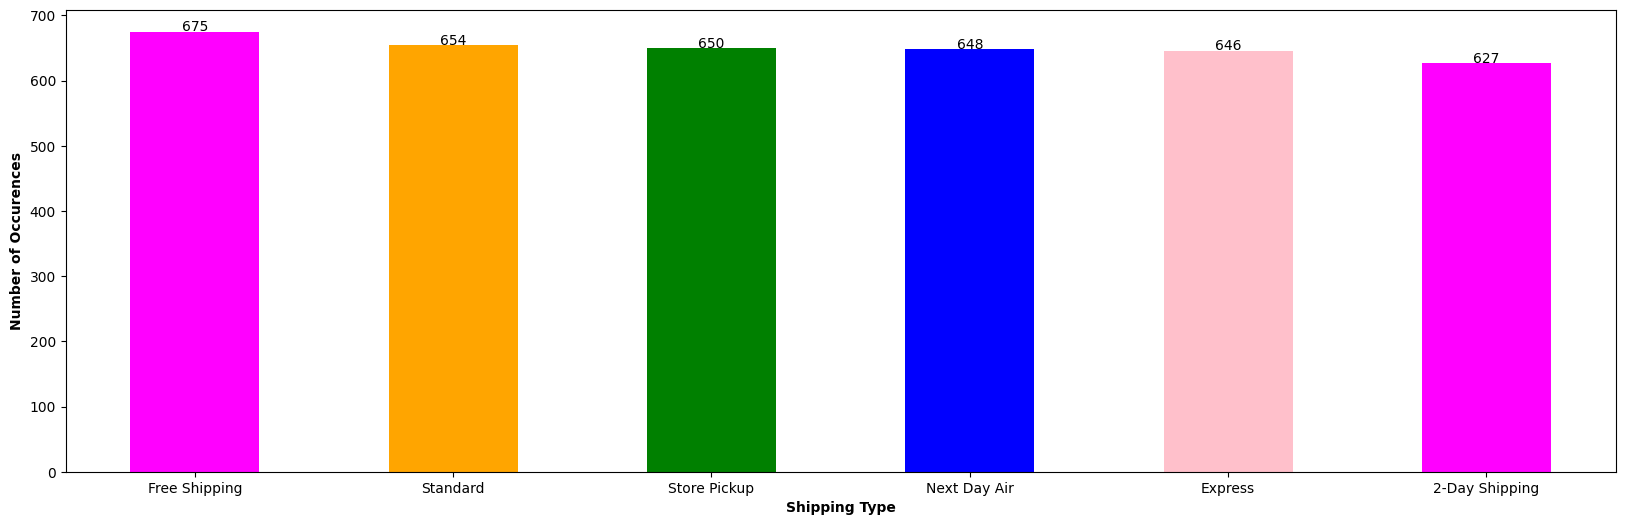

In [15]:
get_BarChart("Shipping Type")

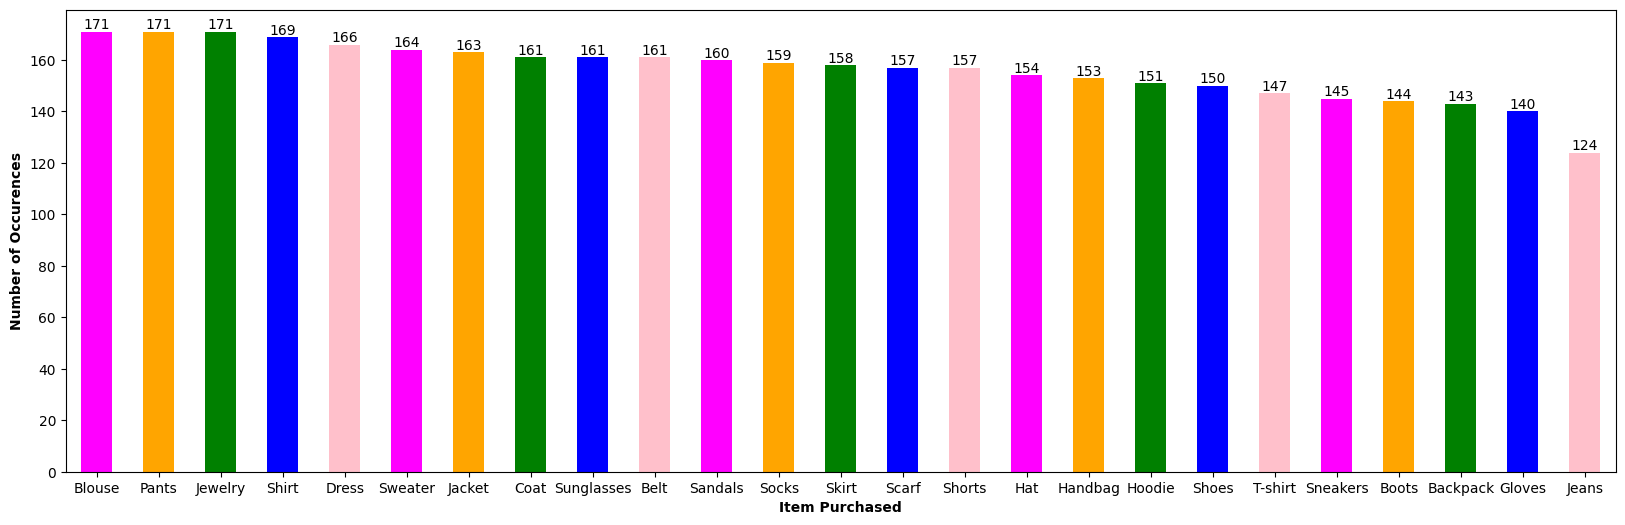

In [16]:
get_BarChart("Item Purchased")

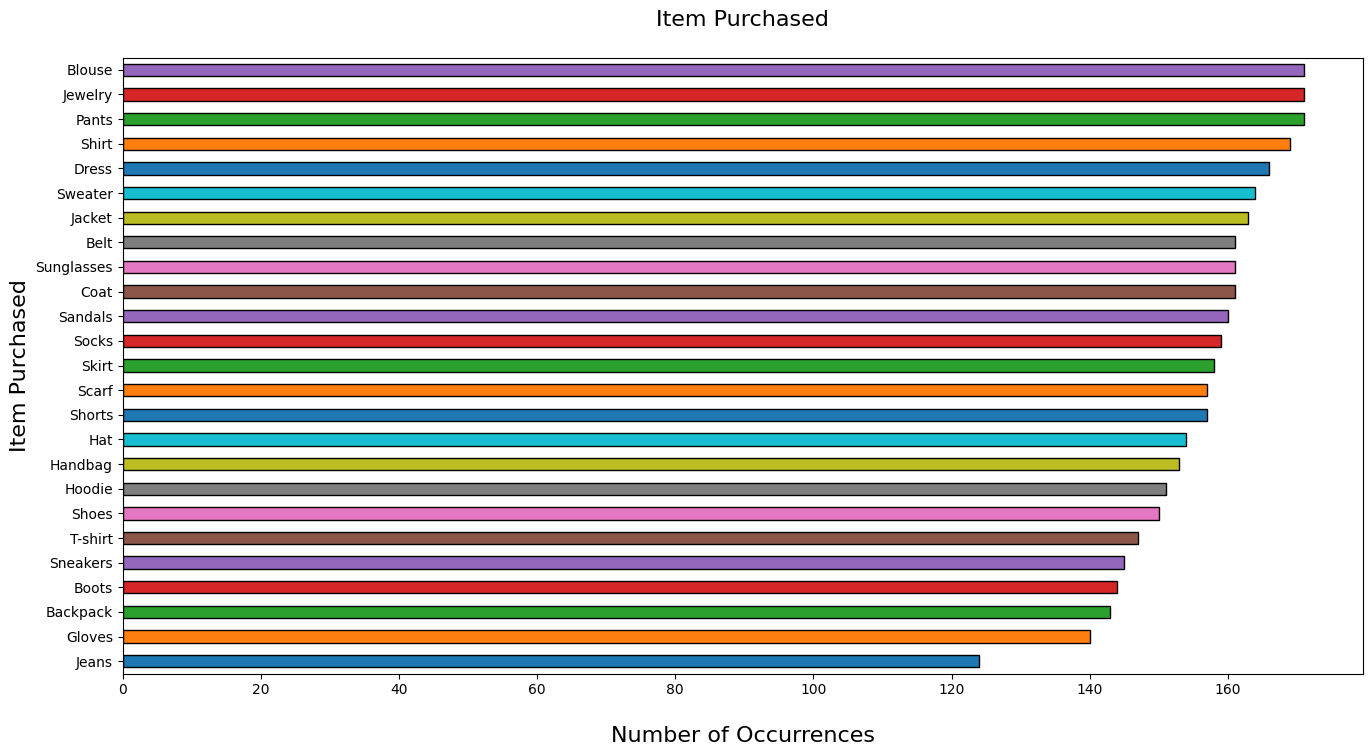

In [17]:
plt.figure(figsize=(16,8))
df['Item Purchased'].value_counts().sort_values().plot(kind='barh', color=sns.color_palette('tab10'), edgecolor='black')

plt.ylabel('Item Purchased', fontsize=16)
plt.xlabel('\nNumber of Occurrences', fontsize=16)
plt.title('Item Purchased\n', fontsize=16)

plt.show()

In [18]:
df['Location'].value_counts()

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
Missouri          81
New Mexico        81
Mississippi       80
Kentucky          79
Arkansas          79
Georgia           79
Indiana           79
Connecticut       78
North Carolina    78
Maine             77
Ohio              77
Virginia          77
Texas             77
Tennessee         77
South Carolina    76
Oklahoma          75
Wisconsin         75
Colorado          75
Oregon            74
Pennsylvania      74
Michigan          73
Washington        73
Alaska            72
Massachusetts     72
Utah              71
Wyoming           71
New Hampshire     71
South Dakota      70
Iowa              69
Florida           68
New Jersey        67
Arizona           65
Hawa

In [19]:
df['Size'].value_counts()

Size
M     1755
L     1053
S      663
XL     429
Name: count, dtype: int64

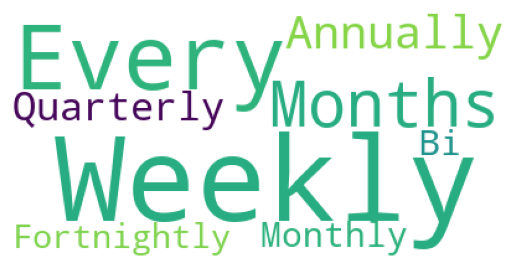

In [20]:
text = " ".join(title for title in df['Frequency of Purchases'])
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.axis('off')
plt.imshow(word_cloud)
plt.show()

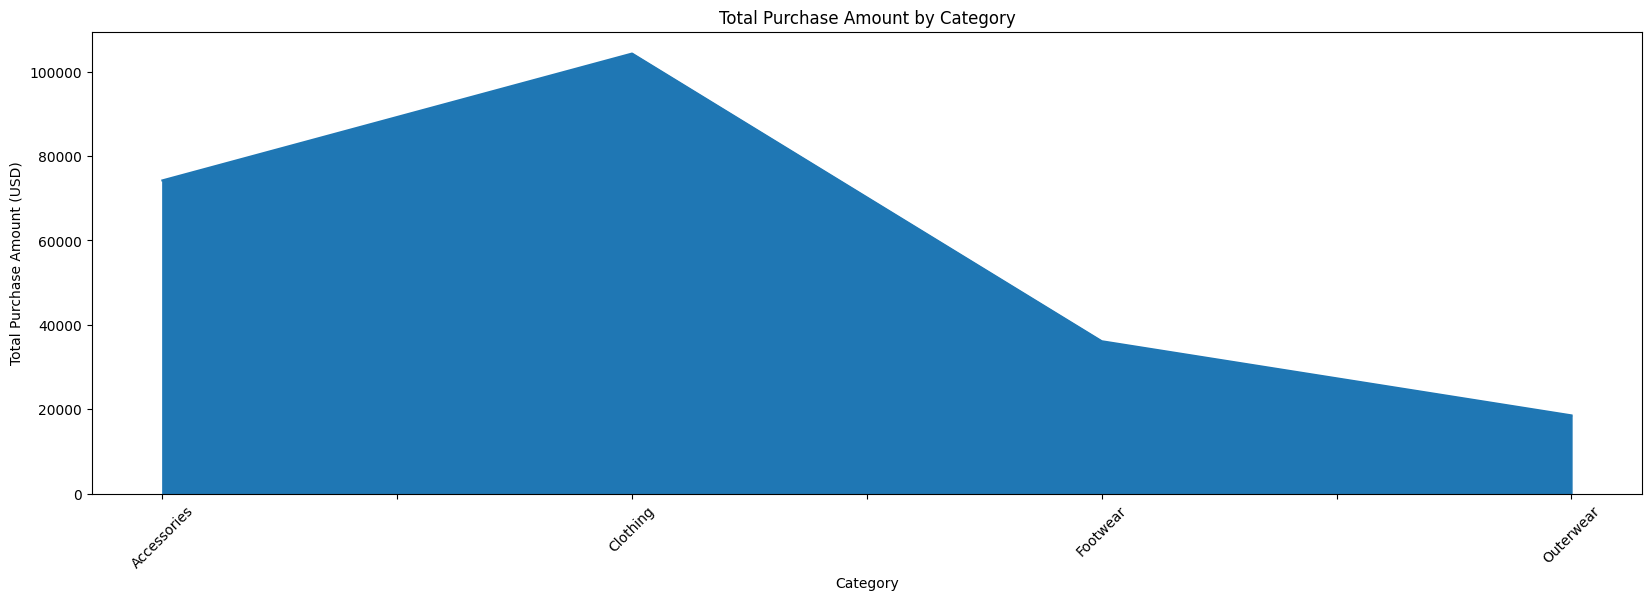

In [21]:
plt.figure(figsize=(20,6))
category_purchase_total = df.groupby('Category')['Purchase Amount (USD)'].sum()

category_purchase_total.plot(kind='area')
plt.title('Total Purchase Amount by Category')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

In [22]:
#What is average age of customers in the dataset?
average_age = df['Age'].mean()
print("Average age : ", average_age)

Average age :  44.06846153846154


In [23]:
#What is most common item purchased?
df['Item Purchased'].mode()
df['Item Purchased'].mode()[0]

'Blouse'

In [25]:
df[df['Gender'] == 'Male']['Item Purchased'].mode()

0    Pants
Name: Item Purchased, dtype: object

In [28]:
#What is most common season for purchases ?
most_common_season = df['Season'].mode()[0]
print("Most common season for Purchases : ", most_common_season)

Most common season for Purchases :  Spring


In [29]:
#What is maximum and minimum review rating in the dataset?
max_review_rating = df['Review Rating'].max()
min_review_rating = df['Review Rating'].min()
print("Maximum Rating : ", max_review_rating)
print("Minimum Rating : ", min_review_rating)

Maximum Rating :  5.0
Minimum Rating :  2.5


In [32]:
#what is average review rating for male and female customers?
average_rating_male = df[df['Gender']=='Male']['Review Rating'].mean()
average_rating_female = df[df['Gender']=='Female']['Review Rating'].mean()
print("Average Rating Male : ", average_rating_male)
print("Average Rating Female : ", average_rating_female)


Average Rating Male :  3.7539592760180995
Average Rating Female :  3.741426282051282


In [33]:
#What is most common category of items purchased by male customers in Winter Season
# with review rating below 3?
common_category_low_rating_male_winter = df[(df['Gender']=='Male')
                                            & (df['Season']=='Winter')
                                            & (df['Review Rating'] < 3)]['Category'].mode()[0]
print("Most common category for Low Rating Male Customers in Winter : ",common_category_low_rating_male_winter)

Most common category for Low Rating Male Customers in Winter :  Clothing


In [34]:
#How many customer have subscription status Yes
# and used a promo code for theie purchase?
subscription_promo_count = df[(df['Subscription Status']=='Yes')
                              & (df['Promo Code Used']=='Yes')]['Customer ID'].count()
print("Number of Customers with subscription and promo code used : ",subscription_promo_count)

Number of Customers with subscription and promo code used :  1053
